In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

In [10]:
df=pd.read_csv("D:\\INSEA\\Stage PFA\\Stage Ministère de finance\\data\\tourism\\KPI_touristique.csv")
trands=pd.read_csv("src/Google Trend/data/trends.csv")

In [11]:
trands

,Date,dollar in moroccan dirham,moroccan oil protect and prevent spray,good food recipes,merzouga tour,morocco travel update,traditional moroccan food,morocco covid travel,moroccan oil gift set,bbc good food crumble,...,casablanca london,spain portugal morocco itinerary,moroccan food toronto,taj moroccan food,marrakech souks,best months to visit morocco,morocco food,moroccan restaurant,moroccan restaurants london,moroccan oil shampoo and conditioner
0,01-2010,0,0,99,0,0,100,0,0,0,...,83,0,0,0,40,0,27,91,100,0
1,02-2010,0,0,100,0,0,0,0,0,0,...,100,0,0,0,0,0,30,93,68,0
2,03-2010,0,0,96,0,0,79,0,0,0,...,77,0,0,0,42,0,32,86,0,0
3,04-2010,0,0,84,0,0,0,0,0,0,...,76,0,0,0,55,0,24,86,51,20
4,05-2010,0,0,79,0,39,0,0,0,22,...,73,0,0,0,48,0,27,88,0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,02-2025,33,0,23,100,0,68,0,0,41,...,72,0,0,100,97,0,45,48,0,27
170,03-2025,39,71,20,95,0,70,0,0,46,...,63,0,0,0,96,0,41,60,14,25
171,04-2025,50,0,20,79,0,45,0,0,47,...,71,0,0,0,100,0,42,52,0,28
172,05-2025,43,0,19,63,0,58,0,0,43,...,72,54,0,87,97,91,44,50,0,26


In [12]:
df=df[:184]
trands=trands[:len(trands)-2]
trands['Date'] = pd.to_datetime(trands['Date'])
df['Date'] = pd.to_datetime(df['Date'])


C:\Users\masta\AppData\Local\Temp\ipykernel_19240\3066420310.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  trands['Date'] = pd.to_datetime(trands['Date'])
C:\Users\masta\AppData\Local\Temp\ipykernel_19240\3066420310.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trands['Date'] = pd.to_datetime(trands['Date'])


In [13]:
df

,Date,TES,MRE,Total Arrivées,Nuité,Taux d'occupation
0,2010-01-01,291608.0,216485.0,508093.0,NaN,NaN
1,2010-02-01,327017.0,214346.0,541363.0,NaN,NaN
2,2010-03-01,437338.0,234940.0,672278.0,NaN,NaN
3,2010-04-01,432338.0,232737.0,665075.0,NaN,NaN
4,2010-05-01,430974.0,241339.0,672313.0,NaN,NaN
...,...,...,...,...,...,...
179,2024-12-01,784192.0,753742.0,1537934.0,1950797.0,48.0
180,2025-01-01,624848.0,640349.0,1265197.0,1748788.0,44.0
181,2025-02-01,761377.0,634800.0,1396177.0,1797178.0,50.0
182,2025-03-01,768739.0,583272.0,1352011.0,1754640.0,40.0


In [14]:
df.isnull().sum()

Date                  0
TES                   0
MRE                  12
Total Arrivées       12
Nuité                24
Taux d'occupation    72
dtype: int64

In [15]:
def filter_tourism_keywords(keywords):
    """Garde uniquement les mots-clés touristiques pertinents"""
    import re
    
    # Mots-clés à EXCLURE (non-touristiques)
    EXCLUDE = [
        r'\b(oil|argan|beauty|cosmetic|shampoo|body|hair)\b',
        r'\b(recipe|food|chilli|chocolate|cake|cooking)\b',
        r'\b(bbc|news|article|blog|instagram|facebook)\b',
        r'\b(price|buy|shop|store|amazon|ebay)\b',
        r'\b(job|work|salary|visa application)\b',
    ]
    
    # Mots-clés à INCLURE (touristiques)
    INCLUDE = [
        r'\b(hotel|riad|resort|accommodation|stay|booking)\b',
        r'\b(flight|airport|airline|ticket|travel)\b',
        r'\b(tour|excursion|visit|guide|itinerary|trip)\b',
        r'\b(marrakech|casablanca|fez|chefchaouen|essaouira|tangier|agadir)\b',
        r'\b(sahara|desert|atlas|medina|kasbah|souk)\b',
        r'\b(weather|temperature|climate|best time)\b',
        r'\b(things to do|places to visit|attractions)\b',
        r'\b(restaurant|cuisine|dining)\b',
        r'\b(beach|mountain|hiking|surfing|activities)\b',
    ]
    
    filtered = []
    for kw in keywords:
        kw_lower = kw.lower()
        
        # Exclure si non-touristique
        if any(re.search(pattern, kw_lower) for pattern in EXCLUDE):
            continue
        
        # Inclure si touristique
        if any(re.search(pattern, kw_lower) for pattern in INCLUDE):
            filtered.append(kw)
    
    return filtered

In [16]:
trands=trands.rename(columns={"date":"Date"})
l=trands.columns.tolist()
l.remove("Date")

In [17]:
keywords_cleaned = filter_tourism_keywords(l)
print(len(keywords_cleaned))
trands=trands[["Date"] + keywords_cleaned]
data=pd.merge(trands, df[['Date','TES']], on="Date")

490


In [18]:
data

,Date,merzouga tour,morocco travel update,morocco covid travel,marrakech weather forecast,longue vie hotel marrakech,wydad casablanca,restaurant marrakech kassel,flights to casablanca morocco,marrakech meteo,...,14 day morocco itinerary,tangier morocco map,location riad marrakech,marrakech weather by month,casablanca london,spain portugal morocco itinerary,marrakech souks,best months to visit morocco,moroccan restaurant,TES
0,2010-01-01,0,0,0,76,0,4,0,79,50,...,0,100,88,0,83,0,40,0,91,291608.0
1,2010-02-01,0,0,0,100,0,5,0,63,64,...,0,60,85,0,100,0,0,0,93,327017.0
2,2010-03-01,0,0,0,98,0,5,0,67,60,...,0,81,89,0,77,0,42,0,86,437338.0
3,2010-04-01,0,0,0,51,0,9,0,38,45,...,0,71,68,0,76,0,55,0,86,432338.0
4,2010-05-01,0,39,0,46,0,9,0,66,40,...,0,70,75,0,73,0,48,0,88,430974.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,2024-12-01,71,0,0,14,52,16,49,60,57,...,0,32,13,63,81,0,64,0,50,784192.0
168,2025-01-01,88,0,0,14,89,8,0,87,49,...,0,37,29,100,72,57,94,0,55,624848.0
169,2025-02-01,100,0,0,21,76,9,0,73,56,...,0,43,23,49,72,0,97,0,48,761377.0
170,2025-03-01,95,0,0,23,77,9,0,75,77,...,0,56,24,75,63,0,96,0,60,768739.0


In [19]:
l=data.columns.tolist()
l.remove("Date")
data=data[l]

### Calcul des corrélations avec décalages temporels


In [20]:
dataframe = data

target_col = 'TES'  
keyword_cols = [col for col in dataframe.columns if col != target_col]

results = []


for keyword in keyword_cols:
    correlations = {}
    
    # Tester différents lags (0 à 12 mois)
    for lag in range(1, 13):
    # Décaler la série du keyword
    
        keyword_lagged = dataframe[keyword].shift(lag)

        # Supprimer les valeurs manquantes
        valid_idx = ~(keyword_lagged.isna() | dataframe[target_col].isna())

        if valid_idx.sum() > 10:  # S'assurer qu'il y a assez de données
            # Calculer la corrélation de Pearson
            corr, p_value = pearsonr(
                keyword_lagged[valid_idx], 
                dataframe[target_col][valid_idx]
            )
            correlations[lag] = {
                'correlation': corr,
                'p_value': p_value
            }
    
    # Trouver le lag optimal (corrélation maximale)
    if correlations:
        best_lag = max(correlations.keys(), 
                      key=lambda x: abs(correlations[x]['correlation']))
        best_corr = correlations[best_lag]['correlation']
        best_pvalue = correlations[best_lag]['p_value']
        
        results.append({
            'keyword': keyword,
            'best_lag': best_lag,
            'correlation': best_corr,
            'p_value': best_pvalue,
            'all_correlations': correlations
        })

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('correlation', 
                                    key=abs, 
                                    ascending=False)

print(results_df[['keyword', 'best_lag', 'correlation', 'p_value']])

C:\Users\masta\AppData\Local\Temp\ipykernel_19240\94221215.py:23: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p_value = pearsonr(


                               keyword  best_lag  correlation       p_value
204                  marrakech airport         1     0.789740  1.052126e-37
227                          marrakech         1     0.786069  3.835629e-37
39                      marrakech souk         1     0.767942  1.600169e-34
487                    marrakech souks         1     0.759295  2.353308e-33
217                    morocco airport         1     0.756005  6.354014e-33
..                                 ...       ...          ...           ...
298           morocco itinerary 4 days         8     0.054818  4.857016e-01
133  moroccan restaurant san francisco        12     0.053004  5.056253e-01
112        moroccan restaurant seattle        11    -0.052512  5.082489e-01
76       moroccan restaurant st albans        12     0.051779  5.155229e-01
198    spain morocco itinerary 10 days         8     0.040764  6.042773e-01

[490 rows x 4 columns]


### Sélection des variables finales

In [21]:
# Filtrer les keywords avec corrélation >= 70% (0.7)
threshold = 0.7
selected_keywords = results_df[
    abs(results_df['correlation']) >= threshold
].copy()

print(f"\nNombre de keywords sélectionnés avec corrélation >= 70% : {len(selected_keywords)}")
print("\nKeywords sélectionnés:")
print(selected_keywords[['keyword', 'best_lag', 'correlation']])

# Créer le dataset final avec les variables décalées
final_df = dataframe[[target_col]].copy()

for _, row in selected_keywords.iterrows():
    keyword = row['keyword']
    lag = row['best_lag']
    #final_df[f"{keyword}_lag{lag}"] = dataframe[keyword].shift(lag)
    final_df[f"{keyword}"] = dataframe[keyword].shift(lag)
# Supprimer les lignes avec valeurs manquantes
final_df = final_df.dropna()

#print(f"\nDataset final: {final_df.shape}")
#final_df[selected_keywords['keyword'].head(3)].to_csv('dataset_final_avec_lags.csv', index=False)
print()
print("="*80)
print("\nTop 3 keywords sélectionnés:")
print(selected_keywords[['keyword', 'best_lag', 'correlation']].head(3))


Nombre de keywords sélectionnés avec corrélation >= 70% : 10

Keywords sélectionnés:
                        keyword  best_lag  correlation
204           marrakech airport         1     0.789740
227                   marrakech         1     0.786069
39               marrakech souk         1     0.767942
487             marrakech souks         1     0.759295
217             morocco airport         1     0.756005
408        aeropuerto marrakech         1     0.729697
188  best time to visit vietnam         1     0.728172
230                   essaouira         1     0.722959
456     marrakech to casablanca         1     0.712056
126  jardin majorelle marrakech         1     0.700372


Top 3 keywords sélectionnés:
               keyword  best_lag  correlation
204  marrakech airport         1     0.789740
227          marrakech         1     0.786069
39      marrakech souk         1     0.767942


In [32]:
matrice = data[["marrakech airport","marrakech","marrakech souk"]].corr()
print(matrice)

                   marrakech airport  marrakech  marrakech souk
marrakech airport           1.000000   0.848078        0.861749
marrakech                   0.848078   1.000000        0.874595
marrakech souk              0.861749   0.874595        1.000000


<Axes: >

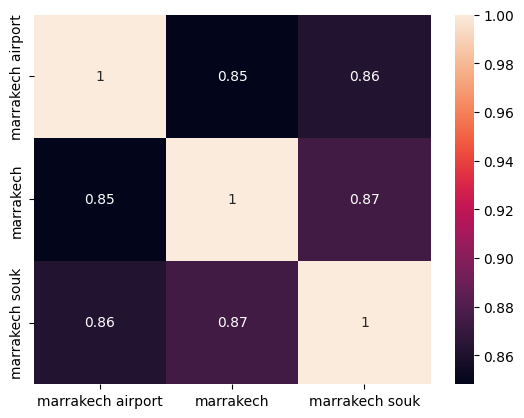

In [33]:
sns.heatmap(matrice,annot=True)

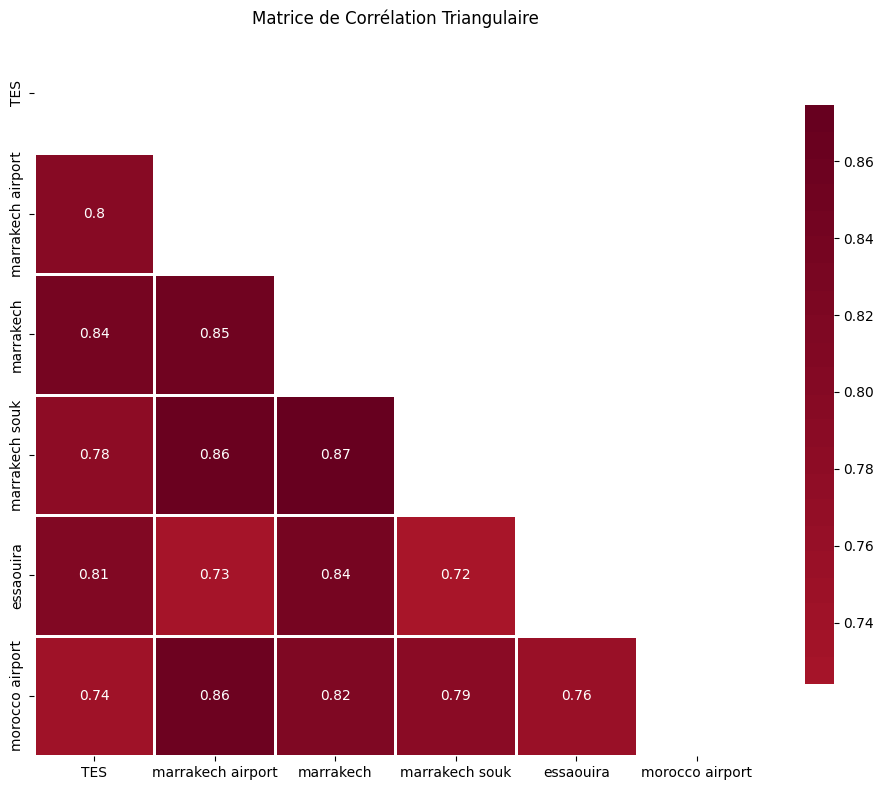

In [31]:
mask = np.triu(np.ones_like(matrice, dtype=bool))

# Créer la figure
plt.figure(figsize=(10, 8))

# Afficher la heatmap avec le masque
sns.heatmap(matrice, 
            mask=mask,           # Masque triangulaire
            annot=True,          # Afficher les valeurs
            cmap='RdBu_r',     # Palette de couleurs
            center=0,            # Centrer la palette sur 0
            square=True,         # Cellules carrées
            linewidths=1,        # Lignes entre les cellules
            cbar_kws={"shrink": 0.8})  # Barre de couleur

plt.title('Matrice de Corrélation Triangulaire')
plt.tight_layout()
plt.show()